Harsh Karia <br>
GitHub Username: harshkaria <br>
USC ID: 5860082592 <br>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as spy
import statsmodels.api as sm
from scipy.stats import iqr
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing



df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx') # Reading all sheets

print(df.shape)

(9568, 5)


In [3]:
def linear_regression(x, y):  
    model = sm.OLS(y, x).fit()
    coeffs = model.params
    p_vals = model.pvalues
    t_vals = model.tvalues
    r2_err = model.rsquared
    
    return (coeffs, p_vals, t_vals, r2_err, model)

In [4]:
def mult_linear_regression(x, y, deg=3):
    polynomial_features= PolynomialFeatures(degree=deg, include_bias=False)
    xp = polynomial_features.fit_transform(x)
    xp = sm.add_constant(xp)
    model = sm.OLS(y, xp).fit()
    
    coeffs = model.params
    p_vals = model.pvalues
    t_vals = model.tvalues
    r2_err = model.rsquared
    
    return (coeffs, p_vals, t_vals, r2_err, model)

In [5]:
def mult_linear_regression_interaction(x, y, deg=3):
    polynomial_features= PolynomialFeatures(degree=deg, interaction_only=True, include_bias=False)
    xp = polynomial_features.fit_transform(x)
    xp = sm.add_constant(xp)
    model = sm.OLS(y, xp).fit()
    
    coeffs = model.params
    p_vals = model.pvalues
    t_vals = model.tvalues
    r2_err = model.rsquared
    
    return (coeffs, p_vals, t_vals, r2_err, model)

In [6]:
def plot_linear_regression(title, x, y, feature, prediction, slope, intercept, r2_error):
    plt.scatter(x, y, s=1)
    
    x_vals = np.arange(x.min(), x.max())
    y_vals = slope*x_vals + intercept
    eq = feature + '*' + str(slope)+ '+'+str(intercept)
    
    label = eq + ', R^2=' + str(r2_error)
    plt.plot(x_vals, y_vals, 
             label=label, color='black')
    plt.legend(loc='best')
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel(prediction)
    plt.show()


## Part B

i) There are 9568 rows and 5 columns. The rows represent individual data points and the first 4 columns represent features. The fifth one represents the dependent variable, EP


         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


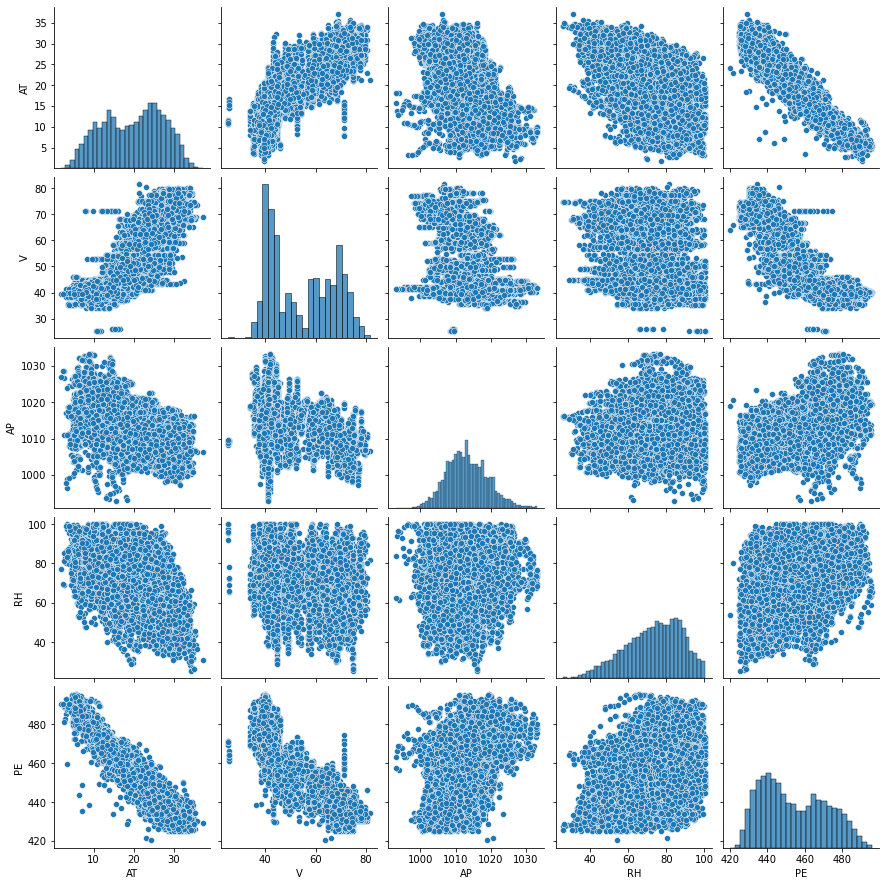

In [7]:
print(df)
sns.pairplot(df)

In [7]:
corr_mat = df.corr()
print('Correlation Matrix - 1iii:')
corr_mat.style.background_gradient(cmap='coolwarm')

Correlation Matrix - 1iii:


,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [8]:
at_mean = df.loc[:, 'AT'].mean()
v_mean = df.loc[:, 'V'].mean()
ap_mean = df.loc[:, 'AP'].mean()
rh_mean = df.loc[:, 'RH'].mean()
pe_mean = df.loc[:, 'PE'].mean()

at_median = df.loc[:, 'AT'].median()
v_median = df.loc[:, 'V'].median()
ap_median = df.loc[:, 'AP'].median()
rh_median = df.loc[:, 'RH'].median()
pe_median = df.loc[:, 'PE'].median()

at_range = df.loc[:, 'AT'].max() - df.loc[:, 'AT'].min()
v_range  = df.loc[:, 'V'].max() - df.loc[:, 'V'].min()
ap_range  = df.loc[:, 'AP'].max() - df.loc[:, 'AP'].min()
rh_range  = df.loc[:, 'RH'].max() - df.loc[:, 'RH'].min()
pe_range = df.loc[:, 'PE'].max() - df.loc[:, 'PE'].min()

at_q1 = np.percentile(df.loc[:, 'AT'], 25)
v_q1 = np.percentile(df.loc[:, 'V'], 25)
ap_q1 = np.percentile(df.loc[:, 'AP'], 25)
rh_q1 = np.percentile(df.loc[:, 'RH'], 25)
pe_q1 = np.percentile(df.loc[:, 'PE'], 25)

at_q3 = np.percentile(df.loc[:, 'AT'], 75)
v_q3 = np.percentile(df.loc[:, 'V'], 75)
ap_q3 = np.percentile(df.loc[:, 'AP'], 75)
rh_q3 = np.percentile(df.loc[:, 'RH'], 75)
pe_q3 = np.percentile(df.loc[:, 'PE'], 75)

at_iqr = iqr(df.loc[:, 'AT'])
v_iqr = iqr(df.loc[:, 'V'])
ap_iqr = iqr(df.loc[:, 'AP'])
rh_iqr = iqr(df.loc[:, 'RH'])
pe_iqr = iqr(df.loc[:,'PE'])

In [9]:
df_desc = pd.DataFrame([('AT', at_mean, at_median, at_range, at_q1, at_q3, at_iqr),
                   ('V', v_mean, v_median, v_range, v_q1, v_q3, v_iqr),
                   ('AP', ap_mean, ap_median, ap_range, ap_q1, ap_q3, ap_iqr),
                   ('RH', rh_mean, rh_median, rh_range, rh_q1, rh_q3, rh_iqr),
                   ('PE', pe_mean, pe_median, pe_range, pe_q1, pe_q3, pe_iqr)],
                    columns=('Feature', 'Mean', 'Median', 'Range', 'Q1', 'Q3', 'IQR' ))

df_desc

,Feature,Mean,Median,Range,Q1,Q3,IQR
0,AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
1,V,54.305804,52.080,56.20,41.7400,66.54,24.8000
2,AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
3,RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
4,PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


PE
AT
[497.03411989  -2.17131996] [0. 0.] [3177.28043321 -291.71519543] 0.8989475964148236


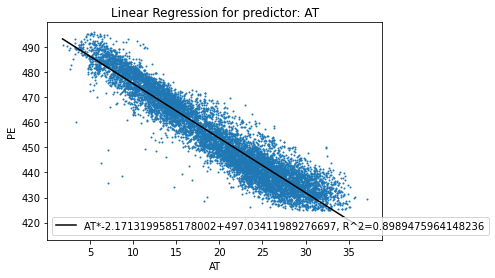

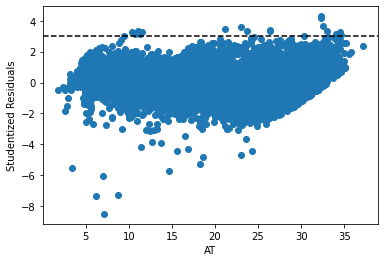

0.0
V
[517.80152631  -1.16813513] [0. 0.] [1370.21815864 -172.4015396 ] 0.7565177870683979


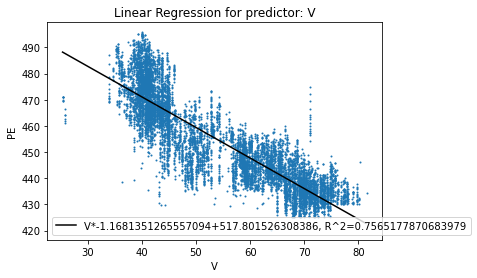

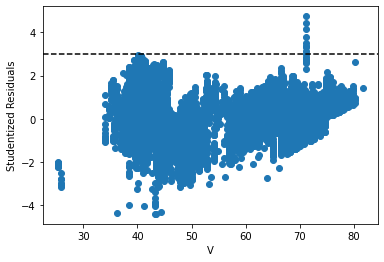

0.0
AP
[-1055.26098898     1.48987167] [0. 0.] [-41.44862779  59.2962323 ] 0.2687686564110674


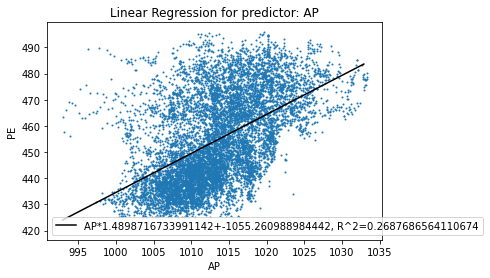

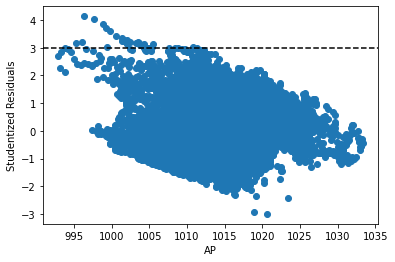

0.0
RH
[420.96176616   0.4556501 ] [0. 0.] [511.67616662  41.39872979] 0.15193944023117578


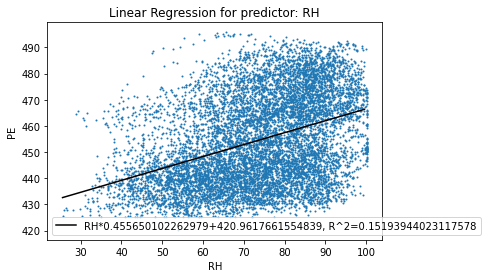

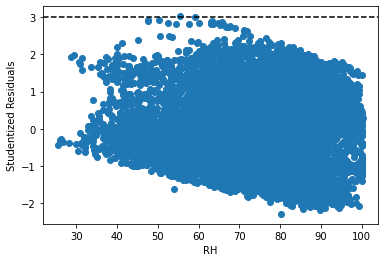

0.0


In [10]:
feature_regressions = {}
features = df.columns
# Dependent variable, the variable we are trying to predict
prediction = features[-1]
print(prediction)

for feature in features[:-1]:
    feature_regressions[feature] = {}
    print(feature)
    df_x = np.array(df[feature])
    df_y = np.array(df.loc[:, prediction])
    f_x = np.reshape(df_x, (len(df_x), 1))
    f_x = sm.add_constant(f_x)
    p_y =  df_y
    #print(f_x.size)
    #print(f_y.size)
    
    coeffs, p_vals, t_vals, r2_err, model = linear_regression(f_x, p_y)
    
    print(coeffs, p_vals, t_vals, r2_err)
    title = 'Linear Regression for predictor: ' + feature
    plot_linear_regression(title, df_x, p_y, feature, prediction, 
                       coeffs[1], coeffs[0], r2_err)
    
    # Outlier Testing
    outliers = model.outlier_test()
    stu_resid = outliers[:, 0]
    # Plot
    predictor_var = df_x
    plt.scatter(predictor_var, stu_resid)
    plt.axhline(y=3, color = 'black', linestyle='--')
    plt.xlabel(feature)
    plt.ylabel('Studentized Residuals')
    plt.show()
    
    # Significance Detection
    print(p_vals[1])
    if(p_vals[1] <= 0.05):
        feature_regressions[feature]["sig"] = "Significant"
    else:
        feature_regressions[feature]["sig"] = "Insignificant"
        
    feature_regressions[feature]["coeff"] = coeffs[1] 
        
    
    # feature_regressions[feature]["significance"]
        
#     Cols: feature, statistically significant,
    


In [11]:
df_desc_simple_reg = pd.DataFrame([('AT', feature_regressions['AT']['sig'], True),
                   ('V', feature_regressions['V']['sig'], True),
                   ('AP', feature_regressions['AP']['sig'], True),
                   ('RH', feature_regressions['RH']['sig'], False)],
                    columns=('Feature', 'Significance', 'Anomalies'))

df_desc_simple_reg

,Feature,Significance,Anomalies
0,AT,Significant,True
1,V,Significant,True
2,AP,Significant,True
3,RH,Significant,False


## 1d - Multiple Regression Model

In [15]:
# feature_regressions = {}
# features = df.columns
# # Dependent variable, the variable we are trying to predict
# prediction = features[-1]
# print(prediction)

table_data_mr = {
    "constant": {},
    "AT": {},
    "V": {},
    "AP": {},
    "RH": {}
}

df_x = np.array(df[['AT', 'V', 'AP', 'RH']])
df_y = np.array(df.loc[:, prediction])
f_x = np.reshape(df_x, (len(df_x), 4))
f_x = sm.add_constant(f_x)
p_y =  df_y
#print(f_x.size)
#print(f_y.size)

coeffs, p_vals, t_vals, r2_err, model = linear_regression(f_x, p_y)

print(coeffs, p_vals, t_vals, r2_err)
table_data_mr["constant"]["coeff"] = coeffs[0]
table_data_mr["constant"]["p_val"] = p_vals[0]
table_data_mr["constant"]["t-val"] = t_vals[0]

table_data_mr["AT"]["coeff"] = coeffs[1]
table_data_mr["V"]["coeff"] = coeffs[2]
table_data_mr["AP"]["coeff"] = coeffs[3]
table_data_mr["RH"]["coeff"] = coeffs[4]

print(model.summary())




# title = 'Linear Regression for predictor: ' + feature
# plot_linear_regression(title, df_x, p_y, feature, prediction, 
#                    coeffs[1], coeffs[0], r2_err)

# # Outlier Testing
# outliers = model.outlier_test()
# stu_resid = outliers[:, 0]
# # Plot
# predictor_var = df_x
# plt.scatter(predictor_var, stu_resid)
# plt.axhline(y=3, color = 'black', linestyle='--')
# plt.xlabel(feature)
# plt.ylabel('Studentized Residuals')
# plt.show()

# # Significance Detection
# print(p_vals[1])
# if(p_vals[1] <= 0.05):
#     feature_regressions[feature] = "Significant"
# else:
#     feature_regressions[feature] = "Insignificant"
        
    
    # feature_regressions[feature]["significance"]
        
#     Cols: feature, statistically significant,

[ 4.54609274e+02 -1.97751311e+00 -2.33916423e-01  6.20829438e-02
 -1.58054103e-01] [0.00000000e+000 0.00000000e+000 4.37530536e-215 5.50710885e-011
 3.10458442e-293] [  46.63370904 -129.34202401  -32.12210891    6.56408572  -37.91847311] 0.9286960898122536
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:20:18   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonr

### All predictors are significant

### 1e - univariate regression coefficients vs multivariate coefficients

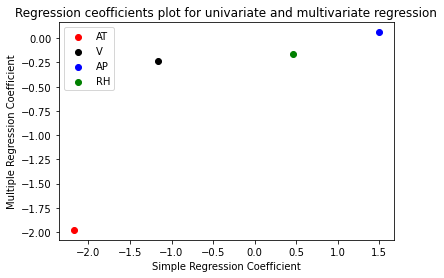

In [18]:
i = 0
color = ['red', 'black', 'blue', 'green']
for feature in feature_regressions.keys():
    simple_coeff = feature_regressions[str(feature)]["coeff"]
    mlt_coeff = table_data_mr[str(feature)]["coeff"]
    #print(simple_coeff, mlt_coeff)
    plt.scatter(simple_coeff, mlt_coeff, color=color[i], label=feature)
    i += 1
plt.xlabel('Simple Regression Coefficient')
plt.ylabel('Multiple Regression Coefficient')
plt.title('Regression ceofficients plot for univariate and multivariate regression')
plt.legend()
plt.show()

### 1f

In [30]:
feature_regressions_poly = {}
features = df.columns
# Dependent variable, the variable we are trying to predict
prediction = features[-1]
print(prediction)

for feature in features[:-1]:
    feature_regressions_poly[feature] = {}
    print(feature)
    df_x = np.array(df[feature])
    df_y = np.array(df.loc[:, prediction])
    f_x = np.reshape(df_x, (len(df_x), 1))
    p_y =  df_y
    #print(f_x.size)
    #print(f_y.size)
    
    coeffs, p_vals, t_vals, r2_err, model = mult_linear_regression(f_x, p_y)
    
    #print(coeffs, p_vals, t_vals, r2_err)
    
    
    # Significance Detection
    print(p_vals[1])
    for x in range(1, 4):
        feature_regressions_poly[feature][x] = {}
        if(p_vals[x] <= 0.05):
            feature_regressions_poly[feature][x]["sig"] = "Significant"
        else:
            feature_regressions_poly[feature][x]["sig"] = "Insignificant"
        
        feature_regressions_poly[feature][x]["coeff"] = coeffs[x] 
        feature_regressions_poly[feature][x]["coeff"] = coeffs[x] 
        
    
    # feature_regressions[feature]["significance"]
        
#     Cols: feature, statistically significant,
    


PE
AT
7.898147240181887e-07
V
2.526589033408045e-05
AP
4.502735428541263e-17
RH
0.00037725099079038803


In [31]:
df_desc_poly_reg = pd.DataFrame([('AT', feature_regressions_poly['AT'][1]['sig']),
                   ('AT^2', feature_regressions_poly['AT'][2]['sig']),
                   ('AT^3', feature_regressions_poly['AT'][3]['sig']),
                   ('V', feature_regressions_poly['V'][1]['sig']),
                   ('V^2', feature_regressions_poly['V'][2]['sig']),
                    ('V^3', feature_regressions_poly['V'][3]['sig']),    
                   ('AP', feature_regressions_poly['AP'][1]['sig']),
                   ('AP^2', feature_regressions_poly['AP'][2]['sig']),
                   ('AP^3', feature_regressions_poly['AP'][3]['sig']), 
                   ('RH', feature_regressions_poly['RH'][1]['sig']),
                   ('RH^2', feature_regressions_poly['RH'][2]['sig']),
                   ('RH^3', feature_regressions_poly['RH'][3]['sig'])],
                    columns=('Feature', 'Significance'))

df_desc_poly_reg

,Feature,Significance
0,AT,Significant
1,AT^2,Significant
2,AT^3,Significant
3,V,Significant
4,V^2,Insignificant
5,V^3,Significant
6,AP,Significant
7,AP^2,Significant
8,AP^3,Significant
9,RH,Significant


There are relationships for all nonlinear predictors except for V^2.

## 1G - Full Linear Regression, Pairwise Interaction

In [32]:
table_data_pi = {
    "constant": {},
    "AT": {},
    "V": {},
    "AP": {},
    "RH": {},
    "AT*V": {},
    "AT*AP": {},
    "AT*RH": {},
    "V*AP": {},
    "V*RH": {},
    "AP*RH":{}
}

df_x = np.array(df[['AT', 'V', 'AP', 'RH']])
df_y = np.array(df.loc[:, prediction])
f_x = np.reshape(df_x, (len(df_x), 4))
p_y =  df_y
#print(f_x.size)
#print(f_y.size)

coeffs, p_vals, t_vals, r2_err, model = mult_linear_regression_interaction(f_x, p_y, 2)

print(coeffs, p_vals, t_vals, r2_err)
table_data_pi["constant"]["coeff"] = coeffs[0]
table_data_pi["constant"]["p_val"] = p_vals[0]
table_data_pi["constant"]["t-val"] = t_vals[0]

table_data_pi["AT"]["coeff"] = coeffs[1]
table_data_pi["V"]["coeff"] = coeffs[2]
table_data_pi["AP"]["coeff"] = coeffs[3]
table_data_pi["RH"]["coeff"] = coeffs[4]

table_data_pi["AT"]["p_val"] = p_vals[1]
table_data_pi["V"]["p_val"] = p_vals[2]
table_data_pi["AP"]["p_val"] = p_vals[3]
table_data_pi["RH"]["p_val"] = p_vals[4]
table_data_pi["AT*V"]["p_val"] = p_vals[5]
table_data_pi["AT*AP"]["p_val"] = p_vals[6]
table_data_pi["AT*RH"]["p_val"] = p_vals[7]
table_data_pi["V*AP"]["p_val"] = p_vals[8]
table_data_pi["V*RH"]["p_val"] = p_vals[9]
table_data_pi["AP*RH"]["p_val"] = p_vals[10]

for key, value in table_data_pi.items():
    if (table_data_pi[key]["p_val"] <= 0.05):
        table_data_pi[key]["sig"] = "Significant Predictor"
    else:
        table_data_pi[key]["sig"] = "Insignificant Predictor"


print(model.summary())


[ 6.85782468e+02 -4.34701412e+00 -7.67485763e+00 -1.52354642e-01
  1.57090705e+00  2.09709231e-02  1.75904518e-03 -5.23035364e-03
  6.81235433e-03  8.38633179e-04 -1.61179894e-03] [3.23160694e-018 6.70187269e-002 1.37125079e-008 4.73573175e-002
 4.22521333e-002 3.33335762e-117 4.52050883e-001 1.21694427e-010
 2.87702590e-007 8.61936598e-002 3.36055726e-002] [ 8.7205232  -1.83175708 -5.68187866 -1.98334645  2.03130053 23.3377628
  0.75203109 -6.44435673  5.13500046  1.71600432 -2.12507939] 0.9363057529178326
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:32:55   Log-Likelihood:                -27548.
No. Observati

In [33]:
df_desc_poly_reg = pd.DataFrame([('AT', table_data_pi['AT']['sig']),
                   ('V', table_data_pi['V']['sig']),
                   ('AP', table_data_pi['AP']['sig']),
                   ('RH', table_data_pi['RH']['sig']),
                   ('AT*V', table_data_pi['AT*V']['sig']),
                   ('AT*AP', table_data_pi['AT*AP']['sig']),
                   ('AT*RH', table_data_pi['AT*RH']['sig']),
                   ('V*AP', table_data_pi['V*AP']['sig']),
                   ('V*RH', table_data_pi['V*RH']['sig']),
                   ('AP*RH', table_data_pi['AP*RH']['sig'])],
                    columns=('Feature', 'Significance'))
df_desc_poly_reg

,Feature,Significance
0,AT,Insignificant Predictor
1,V,Significant Predictor
2,AP,Significant Predictor
3,RH,Significant Predictor
4,AT*V,Significant Predictor
5,AT*AP,Insignificant Predictor
6,AT*RH,Significant Predictor
7,V*AP,Significant Predictor
8,V*RH,Insignificant Predictor
9,AP*RH,Significant Predictor


## 1h - Model Improvements

Splitting data

In [34]:
train_data_x, test_data_x, train_data_y, test_data_y = train_test_split(df[['AT', 'V', 'AP', 'RH']], df.loc[:, prediction], 
                                                                train_size=0.70, test_size=0.30)
train_data_x = np.array(train_data_x)
train_data_y = np.array(train_data_y)
test_data_x = np.array(test_data_x)
test_data_y = np.array(test_data_y)

## Model one: Random Split

In [35]:
f_x = np.reshape(train_data_x, (len(train_data_x), 4))
f_x = sm.add_constant(train_data_x)

f_t_x = np.reshape(test_data_x, (len(test_data_x), 4))
f_t_x = sm.add_constant(test_data_x)


coeffs_train, p_vals_train, t_vals_train, r2_err_train, model_train = linear_regression(f_x, train_data_y)
coeffs_test, p_vals_test, t_vals_test, r2_err_test, model_test = linear_regression(f_t_x, test_data_y)


model_train_yp = model_train.predict(f_x)
model_test_yp = model_test.predict(f_t_x)


rmse_train = rmse(train_data_y, model_train_yp)
rmse_test = rmse(test_data_y, model_test_yp)
mse_train = rmse_train ** 2
mse_test = rmse_test ** 2

print(f'MSE Train Random Split: {mse_train}')
print(f'MSE Test Random Split: {mse_test}')



MSE Train Random Split: 20.578530487288155
MSE Test Random Split: 21.20155049142712


### Model with quadratric features + nonlinearities

In [36]:
train_data_y = np.reshape(train_data_y, (len(train_data_y) ,1))
test_data_y = np.reshape(test_data_y, (len(test_data_y),1))

train_data = np.concatenate((train_data_x, train_data_y),1)
train_data = pd.DataFrame(train_data, columns=df.columns)

formula = 'PE ~ AT + V + AP + RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'


model_all = sm.OLS.from_formula(formula = formula, data = train_data).fit()

# print(model_all.summary())

train_data_combined = pd.DataFrame(train_data_x, columns=df.columns[:-1])
model_train_yp = model_all.predict(train_data_combined)
train_all_mse = mean_squared_error(model_train_yp, train_data_y)
print('Train MSE all possible interaction terms and quadratic nonlinearities:', train_all_mse)




test_data_combined = pd.DataFrame(test_data_x, columns=df.columns[:-1])
model_test_yp = model_all.predict(test_data_combined)
test_all_mse = mean_squared_error(model_test_yp, test_data_y)
print('Test MSE all possible interaction terms and quadratic nonlinearities:', test_all_mse)

#print(model_all.summary())
# print(model_all.pvalues)
# print(model_all.pvalues[2])

features = ['Coefficient', 'AT*AT', 'V*V', 'AP*AP', 'RH*RH', 'AT', 'V', 'AT:V', 'AP', 'AT:AP', 'RH', 'AT:RH', 'V:AP', 'V:RH', 'AP:RH']
sig_features = []
insig_features = []

for idx in range(1, len(model_all.pvalues)):
    if model_all.pvalues[idx] <= 0.05:
        sig_features.append(features[idx])
    else:
        insig_features.append(features[idx])

print(f'Significant Features: {sig_features}')
print(f'Insignificant Features: {insig_features}')





Train MSE all possible interaction terms and quadratic nonlinearities: 17.89148110050912
Test MSE all possible interaction terms and quadratic nonlinearities: 18.614211699583578
Significant Features: ['AP*AP', 'RH*RH', 'AT', 'AT:V', 'AP', 'AT:AP', 'AT:RH', 'AP:RH']
Insignificant Features: ['AT*AT', 'V*V', 'V', 'RH', 'V:AP', 'V:RH']


### Model - Removing insignificant features

In [37]:
formula_sig = 'PE ~ AT + AP + V + RH + I(AT**2) + I(AP**2) + I(RH**2) + AT*V + AT*RH + AP*RH'

model_sig = sm.OLS.from_formula(formula = formula_sig, data = train_data).fit()

# print(model_all.summary())

train_data_combined = pd.DataFrame(train_data_x, columns=df.columns[:-1])
model_train_yp_sig = model_sig.predict(train_data_combined)
train_all_mse_sig = mean_squared_error(model_train_yp_sig, train_data_y)
print('Train MSE:', train_all_mse_sig)




test_data_combined = pd.DataFrame(test_data_x, columns=df.columns[:-1])
model_test_yp = model_sig.predict(test_data_combined)
test_all_mse = mean_squared_error(model_test_yp, test_data_y)
print('Test MSE:', test_all_mse)

Train MSE: 17.936410283615633
Test MSE: 18.63640574384811


## 1i -- KNN Regression

In [38]:
def normalize_data(train_x, test_x):
    scaler = preprocessing.MinMaxScaler()
    norm_train_x = pd.DataFrame(scaler.fit_transform(train_x))
    norm_test_x = pd.DataFrame(scaler.fit_transform(test_x))
    
    return norm_train_x, norm_test_x
    

### Without normalization

Best K: 4, MSE: 23.054919484869387


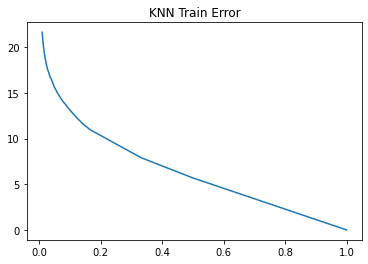

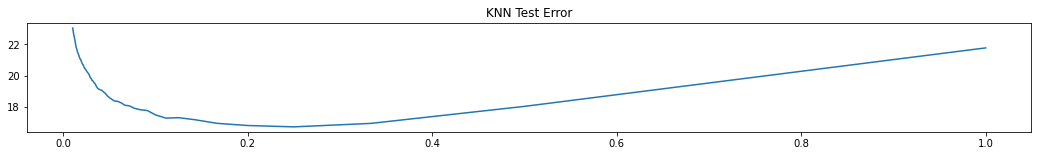

In [39]:
n = 100
train_errs = []
test_errs = []
min_err = 999999
n_size = []
min_k = 200

for k in np.arange(1, n+1, 1):
    n_size.append(1/k)
    model_lc = KNeighborsRegressor(n_neighbors = k)
    model_lc.fit(train_data_x, train_data_y)

    test_predictions_lc = model_lc.predict(test_data_x)
    test_predictions_t_lc = model_lc.predict(train_data_x)

    err = np.mean((test_predictions_lc - test_data_y)**2)
    err_t = np.mean((test_predictions_t_lc - train_data_y)**2)
    train_errs = np.append(train_errs, err_t)
    test_errs = np.append(test_errs, err)
    
    if err < min_err:
        min_err = err
        min_k = k

# print(train_errs)
# print(test_errs)


plt.title('KNN Train Error')
plt.plot(n_size, train_errs)

plt.figure(figsize=(18, 2))
plt.title('KNN Test Error')
plt.plot(n_size, test_errs)

print(f'Best K: {min_k}, MSE: {err}')



### With normalization

Best K: 8, MSE: 22.266011781107622


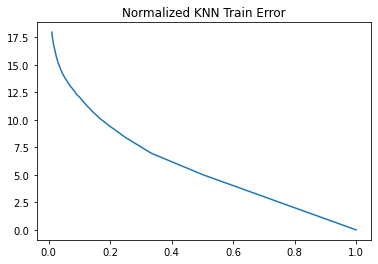

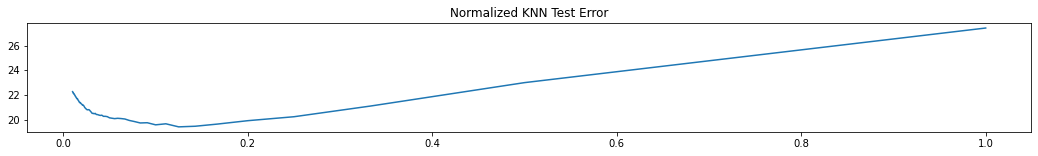

In [40]:
n = 100
train_errs = []
test_errs = []
min_err = 999999
n_size = []
min_k = 200

norm_train_x, norm_test_x = normalize_data(train_data_x, test_data_x)
# print(norm_train_x)
# print(norm_test_x)

for k in np.arange(1, n+1, 1):
    n_size.append(1/k)
    model_lc = KNeighborsRegressor(n_neighbors = k)
    model_lc.fit(norm_train_x, train_data_y)

    test_predictions_lc = model_lc.predict(norm_test_x)
    test_predictions_t_lc = model_lc.predict(norm_train_x)

    err = np.mean((test_predictions_lc - test_data_y)**2)
    err_t = np.mean((test_predictions_t_lc - train_data_y)**2)
    train_errs = np.append(train_errs, err_t)
    test_errs = np.append(test_errs, err)
    
    if err < min_err:
        min_err = err
        min_k = k

# print(train_errs)
# print(test_errs)


plt.title('Normalized KNN Train Error')
plt.plot(n_size, train_errs)

plt.figure(figsize=(18, 2))
plt.title('Normalized KNN Test Error')
plt.plot(n_size, test_errs)

print(f'Best K: {min_k}, MSE: {err}')

### 1j- Comparisons

The smallest test error for linear regression models was the model with all possible interaction terms and quadratric nonlinearities, and the KNN has a slightly higher MSE comparable to that of a random split. Removing insignificant features after adding quadratic nonlinearities allows us to compute the best possible function for the data to fit on. KNN makes no distinctions on the individual features fed into the model

### 2.4.1:

<br>
a: Flexible Method would be better as the sample size is large and would cluster more data together to find patterns <br>
b: Flexible method would be worse as observations is small, may overfit <br>
c: Flexible would be better -- as the non-linear relationships would be described <br>
d: None - we would need to run both (less flexible to not overfit) <br>

### 2.4.7:
1: a: D1: 3 <br>
   b: D2: 2 <br>
   c: D3: sqrt(10) <br>
   d: D4: sqrt(5) <br>
   e: D5: sqrt(2) <br>
   f: D6: sqrt(3) <br>
   
 <br>
 <br>
 2. With K=1, our closest prediction is X5, the closest neighbor. It will be Green
 <br>
 3. With K=3, it will be majority polling of three closest neighbors, X4, X5, X6. It will also be Green
 <br>
 4. If the Bayes decision boundary is highly nonlinear, we would expect the best value of K to be small as smaller Ks tend to produce nonrigid (flexible) boundaries and larger Ks produce linear ones  